In [22]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import scipy as sp
import re
from pprint import pprint
!pip install tqdm
from tqdm import tqdm


[notice] A new release of pip available: 22.2.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [28]:
def get_experiments_list(base_path="/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results/",model="ff",dataset="svhn"):
    path=f"{base_path}/{model}/{dataset}/"
    experiments_list=os.listdir(path)
    path_list=list()
    for exp in experiments_list:
        exp=f"{path}/{exp}"
        path_list.append(exp)
    return path_list

In [48]:
def base_info(path):
    d = dict()
    d["name"]=os.path.basename(path)
    split=d["name"].split("_")
    d["norm"]=split[1]
    d["epochs"]=float(split[2])
    d["batch"]=int(split[3])
    d["lr"]=float(split[4])
    d["path"]=path
    return d

def parse_stat(path):
    d=base_info(path)
    try:
        with open(f"{path}/stats.txt", mode="r") as file:
            for line in file:
                
                if groups:=re.search(r"Total Accuracy (?P<total_accuracy>[0-9][0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    d["accuracy"]=float(group_dict["total_accuracy"])
                    
                if groups:=re.search(r"Accuracy (?P<class>[0-9]) (?P<class_accuracy>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    label=group_dict["class"]
                    d[f"class_accuracy_{label}"]=float(group_dict["class_accuracy"])

                if groups:=re.search(r"Layer (?P<layer>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    d[f"sparseness_layer_{layer}"]=float(group_dict["sparseness"])
                    
                if groups:=re.search(r"Layer (?P<layer>[0-9]) (?P<class>[0-9]) sparseness (?P<sparseness>[0-9]*\.[0-9]+)",line) :
                    group_dict=groups.groupdict()
                    layer=group_dict["layer"]
                    label=group_dict["class"]
                    d[f"sparseness_layer_{layer}_class_{label}"]=float(group_dict["sparseness"])
                    #print(groups.groupdict())
        return d
    except Exception as e:
        print(f"Error opening {e}")
#        df = pd.DataFrame(data, index=[0])


In [49]:
list_exp=get_experiments_list(dataset="svhn",model="ff")

df_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_ff= pd.concat([df_ff, pd.DataFrame([data])], ignore_index=True)   
df_ff=df_ff[(df_ff["accuracy"]>0.60) & (df_ff["norm"]=="l2") & (df_ff["batch"]==2048) ]
print(df_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
0   0.644169            0.886593            0.600948            0.774220
1   0.636447            0.856863            0.511111            0.668191
5   0.622119            0.810702            0.510888            0.489273
6   0.625423            0.792554            0.492575            0.314023
11  0.634565            0.894540            0.614477            0.793086
12  0.637946            0.882643            0.602636            0.765185
13  0.641902            0.881361            0.594126            0.751232
16  0.641019            0.891036            0.611761            0.779646
17  0.616395            0.801918            0.514575            0.453832
18  0.644399            0.870921            0.562842            0.719968
19  0.640827            0.840436            0.525522            0.597500
24  0.605332            0.895951            0.702237            0.819387
27  0.631569            0.836962            0.49593

In [50]:
list_exp=get_experiments_list(dataset="svhn",model="bp")

df_bp=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp= pd.concat([df_bp, pd.DataFrame([data])], ignore_index=True)   
#print(df_bp)
df_bp=df_bp[(df_bp["accuracy"]>0.60) & (df_bp["norm"]=="l2") & (df_bp["batch"]==2048)  ]
print(df_bp[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
0   0.845536            0.470974            0.861373            0.748498
2   0.862323            0.480240            0.868822            0.783709
4   0.846497            0.471916            0.858774            0.751653
5   0.872081            0.485875            0.743177            0.506161
7   0.835817            0.466759            0.852734            0.728396
9   0.845383            0.475452            0.654022            0.436434
10  0.863245            0.481572            0.699466            0.460952
11  0.857099            0.478566            0.686677            0.452110
12  0.828058            0.465151            0.843747            0.714276
13  0.876460            0.488291            0.757105            0.538339
16  0.858290            0.474930            0.863091            0.775747
17  0.836317            0.473836            0.626716            0.431005


In [51]:
list_exp=get_experiments_list(dataset="svhn",model="bp_ff")

df_bp_ff=pd.DataFrame()
for exp in list_exp:
    data = parse_stat(exp)
    #data = pd.DataFrame([data])
    #df = df.append(data) 
    df_bp_ff= pd.concat([df_bp_ff, pd.DataFrame([data])], ignore_index=True)   
df_bp_ff=df_bp_ff[(df_bp_ff["accuracy"]>0.6) & (df_bp_ff["norm"]=="l2") & (df_bp_ff["batch"]==2048)  ]
print(df_bp_ff[["accuracy","sparseness_layer_0","sparseness_layer_1","sparseness_layer_2"]])

    accuracy  sparseness_layer_0  sparseness_layer_1  sparseness_layer_2
0   0.788184            0.800019            0.879531            0.673979
1   0.782921            0.726721            0.894826            0.632976
2   0.647050            0.891030            0.954450            0.992493
4   0.672365            0.919206            0.942224            0.992524
5   0.802743            0.647840            0.892499            0.426504
6   0.768247            0.665418            0.894759            0.630709
7   0.814382            0.573955            0.836721            0.437129
8   0.673402            0.931386            0.940106            1.000000
11  0.786647            0.827690            0.866195            0.690784
12  0.792525            0.796296            0.879332            0.684446
13  0.795943            0.780209            0.881314            0.676780
14  0.649892            0.900133            0.945570            0.995917
15  0.799285            0.540186            0.83066

In [ ]:
df_ff.loc[101]["sparseness_layer_1"]

In [55]:
selected_model={"ff":[df_ff,0],
                "bp":[df_bp,0],
                "bp_ff":[df_bp_ff,0]}

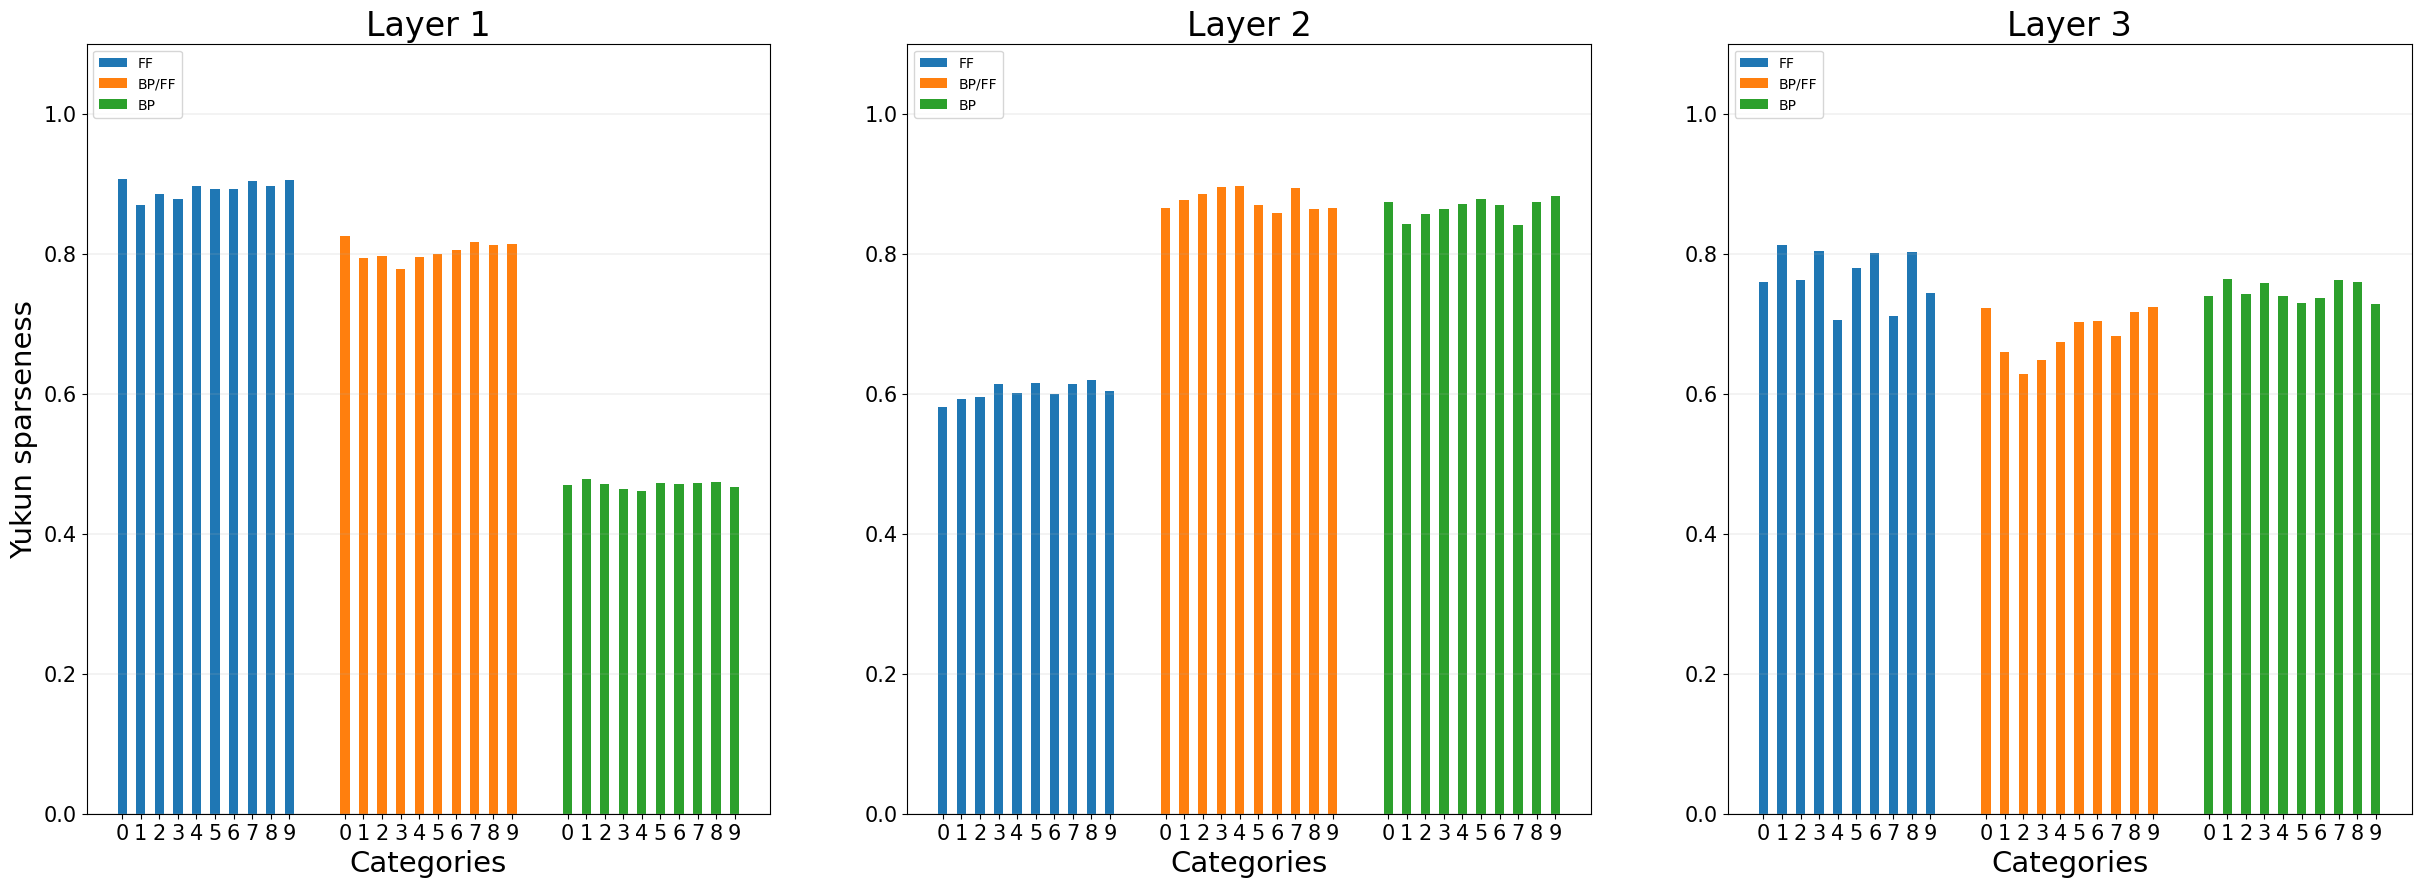

In [56]:
def calculateSize(selected_model):
    '''
    Calculate  the size of the ensembles for each model,layer and category.
    '''
    jitter=np.array([i/10 for i in range(0,10)])
    labels=[i for j in range(3) for i in range(10)]
    #with plt.style.context("_mpl-gallery-nogrid"):
    plt.figure(figsize=(30,10))
    for layer in range(3):
        plt.subplot(1,3,1+layer)
        i=0
        ticks=list()
        for model in ['ff','bp_ff','bp']:
            i+=1.2
            dataframe,index=selected_model[model]
            units=list()
            for lbl in range(10):
                units.append(dataframe.loc[index][f"sparseness_layer_{layer}_class_{lbl}"])
            plt.ylim([0,1.1])
            #plt.yscale("log")
            plt.bar(i+jitter,units,label=model,width=0.05)
            ticks+=(i+jitter).tolist()
        plt.legend(labels=['FF','BP/FF','BP'],loc='upper left')
        plt.title(f'Layer {layer+1}',fontsize=24)
        plt.xticks(ticks=ticks, labels=labels,fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel("Categories",fontsize=21)
        if layer==0:
            plt.ylabel("Yukun sparseness",fontsize=21)
        plt.grid(axis="y",which="both",linewidth=0.2)

calculateSize(selected_model)

In [58]:
def ensembles_loo(representation, thr=0.05):
    means=representation.mean(0)
    ensemble=[]
    for n_id in range(representation.shape[1]):
        means[n_id]
        loo_mean=np.delete(means, n_id, axis=0).mean()
        if (means[n_id]-loo_mean*1)/loo_mean>1:
            ensemble.append(n_id)
        #print(means[n_id], loo_mean)
    return ensemble

In [59]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_shared(path):


    #path=f'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_200_1024_0.001/'
    reps=np.load(path+'reps_0.npy')
    lbls=np.load(path+'lbls_0.npy')
    preds=np.load(path+'prediction_0.npy')
    
    total_data=len(preds)
    order=np.argsort(lbls)
    #order reps,lbls,preds
    reps=reps[order]
    lbls=lbls[order]
    preds=preds[order]
    
    correct=(lbls==preds)
    
    reps=reps[correct]
    lbls=lbls[correct]
    preds=preds[correct]
         
    
    classes=['T-shirt', 'Trouser', 'Pullover', 'Dress' ,'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    active=[]
    for i in range(10):
        if True:
            curr_class=reps[:,0][lbls==i]
            active.append(ensembles_loo(curr_class))
        else:    
            curr_class=reps[:,0][lbls==i]
            thr=np.quantile(curr_class, q=0.9)
            mean=np.median(curr_class, axis=0)
            active.append(np.where(mean>thr)[0])
    
    #active=np.array(active)
    mat=np.zeros((10,10))
    annot_labels = np.empty_like(mat, dtype=str)
    
    for i in range(10):
        for j in range(i+1,10):
            mat[i,j]=(len(np.intersect1d(active[i],active[j])))
            print(f"Intersect: {mat[i,j]} i_len {len(active[i])} j_len {len(active[j])}")
            mat[j,i]=mat[i,j]
            if mat[i,j]>0:
                annot_labels[i,j]=mat[i,j]
                annot_labels[j,i]=mat[j,i]
    print(mat)
    plt.figure(figsize=(8,8), dpi=50)
    sns.set(font_scale = 1.8)
    
    ax =sns.heatmap(mat, cmap='Blues', annot=annot_labels, annot_kws={"fontsize":14},fmt='', xticklabels=classes, yticklabels=classes, cbar=False)
    ax.set_yticklabels(labels=classes, weight='bold')
    ax.set_xticklabels(labels=classes, weight='bold')
    ax.tick_params(left=False, bottom=False)
    #plt.savefig('heatmap.png', bbox_inches = "tight")
    plt.show()
df_ff.loc[106]["path"]

KeyError: 106

In [ ]:
plot_shared('/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_100_1024_0.01/')

In [ ]:
def ensembles_loo(representation, thr=0.05):
    means=representation.mean(0)
    ensemble=[]
    for n_id in range(representation.shape[1]):
        means[n_id]
        loo_mean=np.delete(means, n_id, axis=0).mean()
        if (means[n_id]-loo_mean)/loo_mean>2:
            ensemble.append(n_id)
        #print(means[n_id], loo_mean)
    return ensemble

path=f'/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_100_1024_0.01/'
reps=np.load(path+'reps_0.npy')
lbls=np.load(path+'lbls_0.npy')
preds=np.load(path+'prediction_0.npy')

total_data=len(preds)
order=np.argsort(lbls)
#order reps,lbls,preds
reps=reps[order]
lbls=lbls[order]
preds=preds[order]

correct=(lbls==preds)

reps=reps[correct]
lbls=lbls[correct]
preds=preds[correct]

for exp in range(1): 
    #reps,label,accuracy=load_data('/orfeo/cephfs/home/area/ntosato/scratch/pippo/ForwardForward-machiavelli/results//ff/fashionmnist//relu_l2_200_1024_0.001/')
    for layer in range(reps.shape[1]):
        data[f"layer_{layer}"]=dict()
        for lbl in range(10):
            rep=reps[lbls==lbl,layer,:]
            data[f"layer_{layer}"][f"class_{lbl}"]=ensembles_loo(rep,(layer,lbl))
            plt.figure()
            plt.plot(rep.mean(axis=0),alpha=0.4)
            signal=reps[lbls==lbl,layer,:].mean(axis=0)
            pallocchi=data[f"layer_{layer}"][f"class_{lbl}"]
            plt.scatter(pallocchi,signal[pallocchi],color='r')
            plt.title(f"Class {lbl}, layer {layer}")

In [15]:
df_ff.to_csv('df_ff_fashion.csv')
df_bp.to_csv('df_bp_fashion.csv')
df_bp_ff.to_csv('df_bp_ff_fashion.csv')